In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
sns.set()
%matplotlib inline
#sns.set_palette("Set1")
#sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

# (Section 1) Before neural networks: Logistic regression

## 1.1 The iris dataset

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


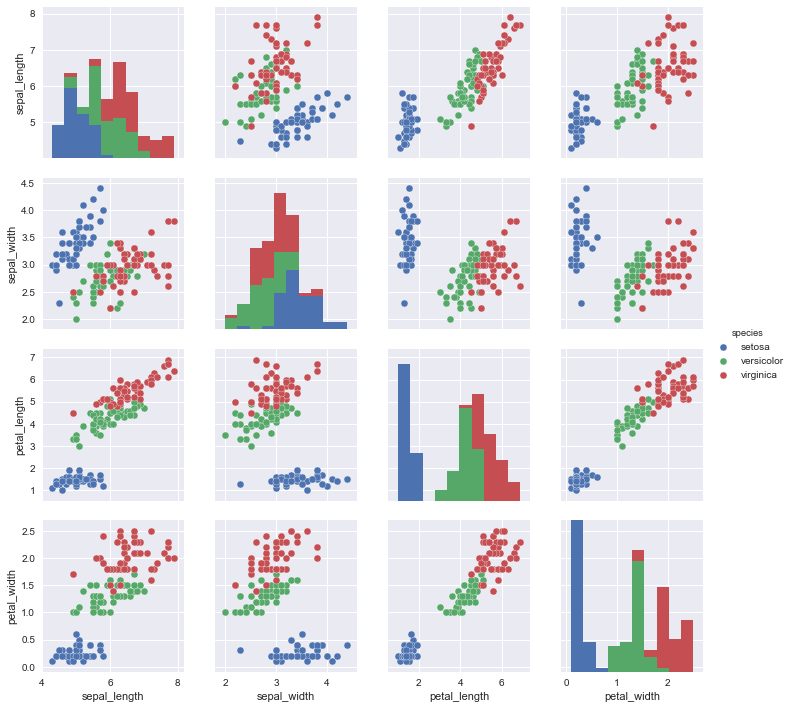

In [3]:
sns.pairplot(iris, hue="species")

# Problem we want to address: knowing the petal width, predict if the iris is a virginica

In [4]:
iris['isVirginica'] = iris['species'] == 'virginica'
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,isVirginica
0,5.1,3.5,1.4,0.2,setosa,False
1,4.9,3.0,1.4,0.2,setosa,False
2,4.7,3.2,1.3,0.2,setosa,False
3,4.6,3.1,1.5,0.2,setosa,False
4,5.0,3.6,1.4,0.2,setosa,False


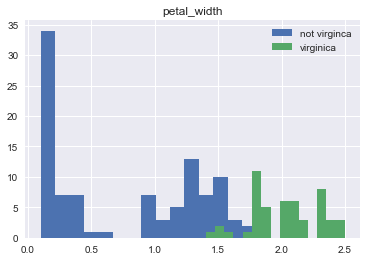

In [24]:
fig, ax = plt.subplots()
iris.groupby('isVirginica').hist(column='petal_width', ax=ax, bins=15);
plt.legend(['not virginca', 'virginica'])

## The sigmoid function

Here the logistic regression algorithm does the following: try to find a function 
$$ P: [0,3] \to [0,1]$$
such that for a random $x \in [0,3]$ corresponding to a petal width, $P(x)$ is an estimate (= a guess) of the probability that the plant is a virginica.

The idea of logistic regression is to look for a function of the form:
$$P_{w,b}(x) = \sigma(wx+b)$$
where 
$$\sigma : \mathbb{R} \to [0,1]$$ is the **sigmoid function ** defined by 
$$ \sigma(x) = \frac{1}{1+e^{-x}}$$
We call $w$ the **weight** and $b$  the **bias**.

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

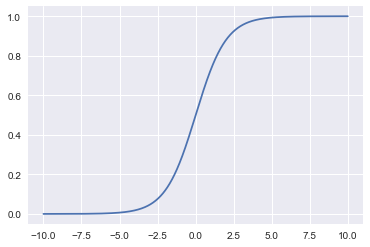

In [7]:
x = np.arange(-10, 10, .01)
plt.plot(x, sigmoid(x))

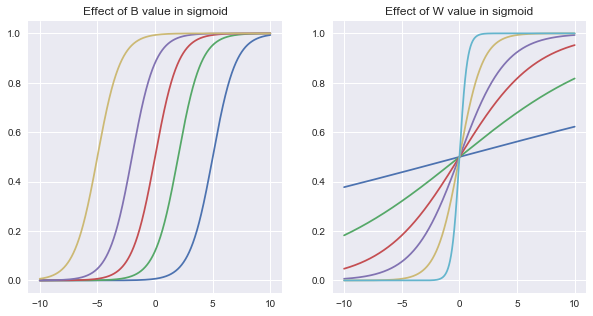

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.set_title('Effect of B value in sigmoid')
for b in [-5, -2, 0, 2, 5]:
    ax1.plot(x, sigmoid(1 * x + b))

ax2.set_title('Effect of W value in sigmoid')
for w in [0.05, .15, .3, .5, 1, 3]:
    ax2.plot(x, sigmoid(w * x + 0))

## 1.2 Logistic regression with sklearn: guessing virginica knowing the petal width

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()
model.fit(iris[['petal_width']], iris[['isVirginica']])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

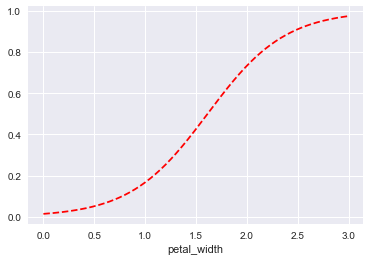

In [12]:
petal_widths = np.arange(0,3,0.01)
predicted_proba = model.predict_proba(petal_widths.reshape(-1,1))[:,1]
plt.plot(petal_widths, predicted_proba, 'r--')
plt.xlabel('petal_width')

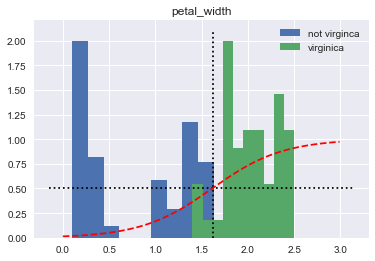

In [13]:
fig, ax = plt.subplots()
iris.groupby('isVirginica').hist(column='petal_width', normed=True, ax=ax);
plt.legend(['not virginca', 'virginica'])
plt.plot(petal_widths, predicted_proba,'r--',label='predicted proba')
plt.hlines(0.5, *ax.get_xlim(), linestyles='dotted')
plt.vlines(petal_widths[np.argmax(predicted_proba > 0.5)], *ax.get_ylim(), linestyles='dotted')

The accuracy of a model evaluated on the sample x,y is defined as 

$$ \text{Accuracy} = \frac{\text{number of samples correctly classified}}{\text{number of samples}}$$

With scikit-learn, we can obtain the accuracy using the score method.

In [15]:
model.score(iris[['petal_width']], iris[['isVirginica']])

0.95999999999999996

# Keras

In [31]:
from keras import regularizers, optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.vis_utils import plot_model, model_to_dot
from IPython.display import SVG

In [39]:
model_keras = Sequential([
    Dense(1, input_dim=1, kernel_regularizer=regularizers.l2(.1)),
    Activation('sigmoid'),
])


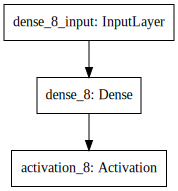

In [40]:
SVG(model_to_dot(model_keras).create(prog='dot', format='svg'))

In [41]:
model_keras.compile(optimizer=optimizers.SGD(lr=0.05), 
                    metrics=['accuracy'],
                    loss='binary_crossentropy')
model_keras.fit(iris[['petal_width']], iris[['isVirginica']], epochs=100)

Epoch 1/100
150/150 [==============================] - 0s 2ms/step - loss: 0.6859 - acc: 0.4200
Epoch 2/100
150/150 [==============================] - 0s 32us/step - loss: 0.6759 - acc: 0.6667
Epoch 3/100
150/150 [==============================] - 0s 38us/step - loss: 0.6671 - acc: 0.6867
Epoch 4/100
150/150 [==============================] - 0s 32us/step - loss: 0.6600 - acc: 0.7933
Epoch 5/100
150/150 [==============================] - 0s 39us/step - loss: 0.6534 - acc: 0.9333
Epoch 6/100
150/150 [==============================] - 0s 41us/step - loss: 0.6470 - acc: 0.9200
Epoch 7/100
150/150 [==============================] - 0s 28us/step - loss: 0.6407 - acc: 0.9667
Epoch 8/100
150/150 [==============================] - 0s 29us/step - loss: 0.6351 - acc: 0.9067
Epoch 9/100
150/150 [==============================] - 0s 25us/step - loss: 0.6302 - acc: 0.8600
Epoch 10/100
150/150 [==============================] - 0s 33us/step - loss: 0.6249 - acc: 0.8867
Epoch 11/100
150/150 [========

In [42]:
model_keras.evaluate(iris[['petal_width']], iris[['isVirginica']])

150/150 [==============================] - 0s 165us/step


[0.52143863439559934, 0.81999999999999995]

In [43]:
model_keras.get_weights()

[array([[ 0.75883788]], dtype=float32), array([-1.58094895], dtype=float32)]

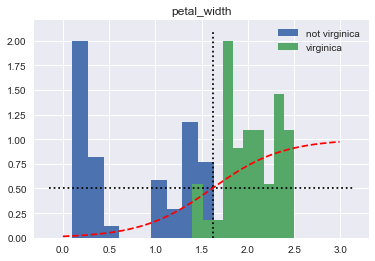

In [44]:
fig, ax = plt.subplots()
iris.groupby('isVirginica').hist(column='petal_width', normed=True, ax=ax);
plt.legend(['not virginica', 'virginica'])
plt.plot(petal_widths, predicted_proba,'r--',label='proba')
plt.hlines(0.5, *ax.get_xlim(), linestyles='dotted')
plt.vlines(petal_widths[np.argmax(predicted_proba > 0.5)], *ax.get_ylim(), linestyles='dotted')

# (Section 2) Gradient descent

# Optimization, gradient descent with Keras

In [46]:
model = Sequential([
    Dense(1,input_dim=1,kernel_regularizer=regularizers.l2(.1)),
    Activation('sigmoid'),
])
model.compile(optimizer=optimizers.SGD(lr=0.05), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
def get_meshgrid(xstart,xend,xstep,ystart,yend,ystep):
    xx,yy = np.mgrid[xstart:xend:xstep,ystart:yend:ystep]
    return xx,yy
x_grid, y_grid = get_meshgrid(-10,10,.1,-10,10,.1)

In [49]:
model.evaluate(x,y)

NameError: name 'y' is not defined

## Plot accuracy

In [ ]:
def get_accuracy(model,weight,bias,x,y,C=1.):
    """Compute the accuracy function."""
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[weight]]) , np.array([bias]) ] ) 
    accuracy = model.evaluate(x,y,verbose=0)[1]
    return accuracy

def get_accuracy1(weigth,bias):
    return get_accuracy(model,weigth,bias,x,y,1.)

vaccuracy = np.vectorize(get_accuracy1)

In [ ]:
#takes two minutes to run
acc_grid = vaccuracy(x_grid,y_grid)

In [ ]:
# import pickle
# with open('../data/acc_grid', 'wb') as f:
#     # Pickle the 'data' dictionary using the highest protocol available.
#     pickle.dump(acc_grid, f)

In [ ]:
# import pickle
# with open('../data/acc_grid', 'rb') as f:
#     # Pickle the 'data' dictionary using the highest protocol available.
#     acc_grid =pickle.load(f)

In [ ]:
fig,ax_acc = plt.subplots(figsize=(15,7))
plt.pcolor(x_grid,y_grid,acc_grid,cmap='RdBu_r')
plt.colorbar()
plt.title('Accuracy',fontsize='xx-large')
plt.xlabel('Weight (w)',fontsize='x-large')
plt.ylabel('Bias (b)',fontsize='x-large')
ax_acc.tick_params(labelsize='large')

There are so many zones where the accuracy are the same that it is impossible to find a method that would improve the weights step by step.

To overcome this problem, we introduce a new metric: the cross entropy which we call our loss function.

## The cross entropy  loss function

Let us fix $w$ and $b$. We define 
$$\mathcal{L}(p,y) = y \log(p) + (1-y)\log(1-p)$$
$$\mathcal{L_{w,b}} = \sum_{i=1}^n y_i \log(p_i) + (1-y_i)\log(1-p_i)$$
where $y_i\in \{0,1\}$ is the actual classe of the i-th sample and $p_i \in [0,1]$ is the probability $P_{w,b}(x_i)$ calculated by the logistic regression model for parameter values $w$ and $b$.

In [ ]:
pp = np.arange(0,1,.01)
loss1 = - np.log(pp)
loss0 = -np.log(1-pp)
plt.plot(pp,loss1,label='y = 1')
plt.plot(pp,loss0,label='y = 0')
plt.xlabel('p',fontsize='xx-large')
plt.ylabel('Loss',fontsize='xx-large')
plt.title('Loss function:  $\mathcal{L}(p,y)$',fontsize='xx-large')
_=plt.legend()

In [ ]:
def initialise_keras_model(initial_weight = 9,initial_bias = 9,lr=0.05,reg=.1):
    model = Sequential()
    model.add(Dense(1,input_dim=1,kernel_regularizer=regularizers.l2(.1)))
    model.add(Activation('sigmoid'))
    sgd = optimizers.SGD(lr=lr)
    model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[initial_weight]]) , np.array([initial_bias]) ] ) 
    return model

In [ ]:
def get_loss(model,weight,bias,x,y,C=1.):
    """Compute the loss function."""
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[weight]]) , np.array([bias]) ] ) 
    loss = model.evaluate(x,y,verbose=0)[0]
    return loss

def get_loss1(weigth,bias):
    return get_loss(model,weigth,bias,x,y,1.)

vloss = np.vectorize(get_loss1)

In [ ]:
loss_grid = vloss(x_grid,y_grid)

In [ ]:
# import pickle
# with open('../data/loss_grid', 'wb') as f:
#     # Pickle the 'data' dictionary using the highest protocol available.
#     pickle.dump(loss_grid, f)

In [ ]:
# import pickle
# with open('../data/loss_grid', 'rb') as f:
#     # Pickle the 'data' dictionary using the highest protocol available.
#     loss_grid =pickle.load(f)

In [ ]:
fig , ax_loss = plt.subplots(figsize=(20,10))
plt.pcolor(x_grid , y_grid , loss_grid , norm=colors.LogNorm() , cmap='RdBu_r')
plt.colorbar()
contour = plt.contour(x_grid, y_grid, loss_grid,20)
plt.title('Loss function',fontsize='xx-large')
plt.xlabel('weight',fontsize='x-large')
plt.ylabel('bias',fontsize='x-large')

model = initialise_keras_model(reg=.05)
steps = 15
for i in range(steps):
    old_weight, old_bias = model.get_weights()[0][0][0], model.get_weights()[1][0]
    model.fit(x,y,verbose=0,epochs = 8)
    weight, bias = model.get_weights()[0][0][0], model.get_weights()[1][0]
    plt.plot([old_weight,weight],[old_bias,bias],'kX--',markersize=8)

# (Section 3) Neural Networks: when linear methods are not sufficient

In [ ]:
plot_histogram('versicolor','petal_width')

## Goal: determine if an iris is a versicolor knowing its petal width

## First let's try using logistic regression

In [ ]:
x = iris.petal_width
y = iris.species.apply(lambda x: 1 if x=='versicolor' else 0)
x_train, x_test, y_train, y_test = \
sklearn.model_selection.train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:
model_versicolor = Sequential()
model_versicolor.add(Dense(1, input_dim=1 , kernel_regularizer=regularizers.l2(.1)))
model_versicolor.add(Activation('sigmoid'))
model_versicolor.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_versicolor.fit(x_train,y_train,epochs=1000)

In [ ]:
plot_histogram('versicolor','petal_width',normed=True)
petal_widths = np.arange(0,3,0.01)
probas = model_versicolor.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths,probas,'r--',label='proba')
plt.plot([0,3],[.5,.5],'k--',linewidth=1,label = 'proba = 0.5')
plt.legend()
plt.yticks([0,0.5,1]);

## Now let's add a new layer to the neural network

In [ ]:
def initialize_versicolor_model(lr = .1,h=5):
    model = Sequential()
    model.add(Dense(h, input_dim=1 ) )
    model.add(Activation('sigmoid'))
    model.add(Dense(1, input_dim=1 ) )
    model.add(Activation('sigmoid'))
    sgd = optimizers.SGD(lr=lr)
    model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_versicolor = initialize_versicolor_model()

In [ ]:
n_rows = n_cols = 3
plt.subplots(n_rows,n_cols,figsize=(18,15),sharex=True,sharey=True)
epochs=200
petal_widths = np.arange(0,3,0.01)
for i in range(1,n_rows**2+1):
    plt.subplot(n_rows,n_cols, i)
    model_versicolor.fit(x_train,y_train,epochs=epochs,verbose=0)
    probas = model_versicolor.predict(petal_widths.reshape(-1,1))[:,0]
    plt.plot(petal_widths,probas,label='after  {} epochs'.format(i*epochs))
    plt.ylim((0,1))
    plt.legend(fontsize='large')

In [ ]:
plot_histogram('versicolor','petal_width',normed=True)
probas = model_versicolor.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths,probas,'b',label='after  {} epochs'.format(i));